# Social Network Analysis with Python and NetworkX

## Creating and Manipulating Graphs using NetworkX

NetworkX is a python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Data Structures: Graphs


* **Graph**: Undirected graph, allows self-loops

In [14]:
G = nx.Graph()

#### Internal Graph representation
Common graph representations, for instance of a complete undirected graph of 3 nodes (ie a triangle):

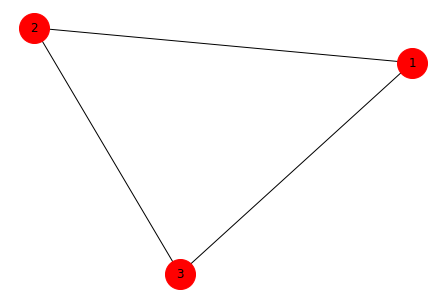

In [3]:
G = nx.Graph()
G.add_edges_from([('1', '2'), ('1', '3'), ('2', '3')])
nx.draw(G, node_size=900, node_color='red', with_labels=True)


**Adjacency Matrix** A $n x n$ matrix:

        0  1  1        G = [[0, 1, 1],
        1  0  1             [1, 0, 1],
        1  1  0             [1, 1, 0]]

**Adjacency List** A list of neighbors:

        A: B, C        G = {'A': ['B', 'C'],
        B: A, C             'B': ['A', 'C'],
        C: A, B             'C': ['A', 'B']} 

**Edge List** A list of edges:

        A B            G = [['A', 'B'],
        A C                 ['A', 'C'],
        B C                 ['B', 'C']]

NetworkX uses a __dictionary of dictionaries__ based **Adjacency List** format which is fast and ligthweight for sparse graphs. 

Internally the node $n$ is a key in the $G.adj$ dictionary, values are themselves dictionaries with neighbors as keys and another dictionary as value that holds edge attributes.

So NetworkX graphs are "dictionaries all the way down". 

In [16]:
print(G.adj)

{}


In [17]:
'1' in G

False

In [6]:
for n in G:
    print(n)

1
2
3


In [7]:
G['1']

AtlasView({'2': {}, '3': {}})

In [8]:
len(G)

3

### Creating Graphs and adding and removing Nodes and Edges


In [18]:
# Create an undirected Graph
G = nx.Graph()
# One node at a time
G.add_node(1)  # "method" of G
# A list of nodes
G.add_nodes_from([2, 3])
# A container of nodes

In [19]:
# Adding a single edge
G.add_edge(1, 2)
# If you have a tuple representing an edge you have to unpack it
e = (2, 3)
G.add_edge(*e) # unpack edge tuple with *
# Add a list of edges 
G.add_edges_from([(1, 2), (1, 3)])

If the edge added already exists no error is raised.

Similarly you can remove nodes and edges

* Removing nodes with:
    - **G.remove_node** : One node at a time
    - **G.remove_nodes_from** : A conteiner of nodes
* Adding edges with:
    - **G.remove_edge**: One edge at a time
    - **G.remove_edges_from** : A container of edges


In practice it's usually more useful to iterate over nodes with their attributes 

In [20]:
list(G.nodes())

[1, 2, 3]

#### Node Attributes

In order to add node attributes you can use the methods **G.add_node** and **G.add_nodes_from**, or the node attribute dictionary **G.node**

In [21]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm') # multiple nodes
G.node[1]['room'] = 714 # add new attribute

AttributeError: 'Graph' object has no attribute 'node'

Adding an edge that is already in the graph does not raise an error, you can add new attributes to an existing edge by adding it again with a new attribute:  

In [22]:
G.add_edge(3, 4, weight=12)

In order to access edge attribute information you can:

In [23]:
# Access the value of attribute weight
G[3][4]['weight'] # or equivalently G.edge[1][2]['weight']

12

In [24]:
# Attributes dictionary for edge 1 -- 2
G[3][4]

{'weight': 12}

In practice it's usually more useful to iterate over edges with their attributes 

In [ ]:
# Edges without attributes
list(G.edges())

In [ ]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

In [ ]:
list(G.edges(data='weight'))

An useful method for quickly looking at our graph is **nx.info**

In [25]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


### Exercise: Building a Graph

Build an undirected graph with 50 nodes named as integers from 1 to 50.

In [26]:
G = nx.Graph()
G.add_nodes_from(range(1, 51))

Add edges between nodes with consecutive numbers, that is, node 1 should have and edge to node 2, node 2 to node 3, etc ...

In [27]:
G.add_edges_from(zip(range(1, 51), range(2, 51)))

### Graph Generators

Take a look at all NetworkX [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

Some examples:

In [28]:
# random graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

### Drawing graphs

In [29]:
G = nx.florentine_families_graph()

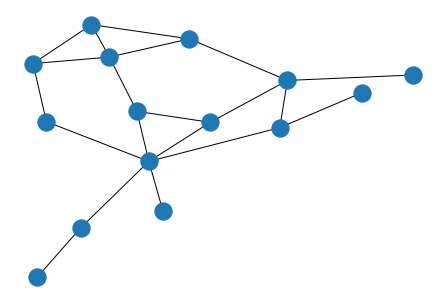

In [30]:
# The function nx.draw is main entry point for NetworkX plotting functions
nx.draw(G)

By default, the layout (that is the position of the nodes in the 2D plane) used is the spring layout. NetworkX, especially in the upcoming 2.0 version, has some more interesting layout algorithms. We can precompute the layout for a given graph and then pass it to the **nx.draw** function

In [31]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([ 0.41746706, -0.39430832]),
 'Medici': array([ 0.23816697, -0.11733526]),
 'Castellani': array([0.02327295, 0.53265105]),
 'Peruzzi': array([-0.27094045,  0.54654267]),
 'Strozzi': array([-0.15619627,  0.37861894]),
 'Barbadori': array([0.2617801 , 0.27596778]),
 'Ridolfi': array([0.03613891, 0.09865419]),
 'Tornabuoni': array([-0.04726664, -0.12569976]),
 'Albizzi': array([-0.18799667, -0.2726494 ]),
 'Salviati': array([ 0.67736078, -0.16477716]),
 'Pazzi': array([ 1.        , -0.20250223]),
 'Bischeri': array([-0.39701524,  0.26254196]),
 'Guadagni': array([-0.39634054, -0.12794901]),
 'Ginori': array([-0.5354025 , -0.27984082]),
 'Lamberteschi': array([-0.66302846, -0.40991463])}

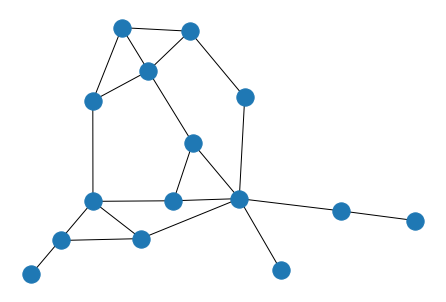

In [32]:
nx.draw(G, pos=pos_fr)

We can also control the size and color of the nodes, the with of the edges, the labels of the nodes and their fonts via *kwargs* of **nx.draw**:

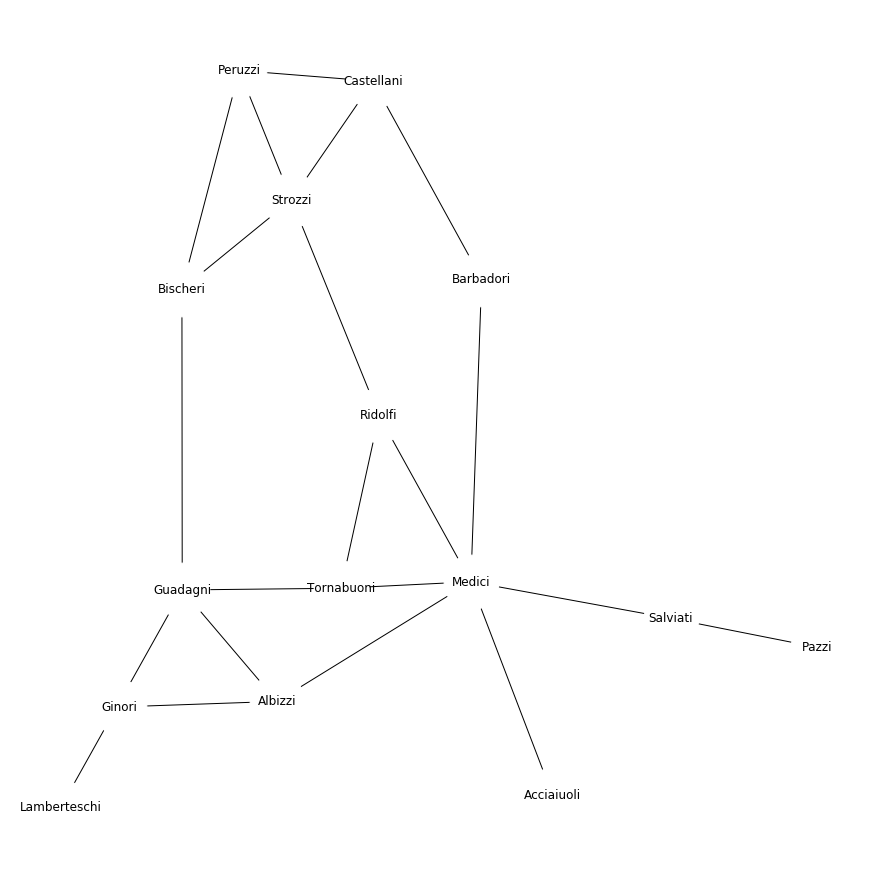

In [33]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

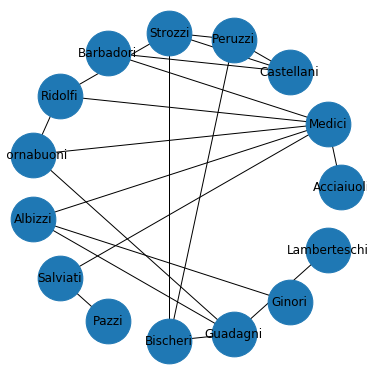

In [34]:
pos_circle = nx.circular_layout(G)
plt.figure(figsize=(5,5))
nx.draw(G, pos=pos_circle, node_size=2000, with_labels=True)

If we want to plot more complex plots, for instance, plot nodes of different colors and sizes, add labels to only some nodes, add edge labels, etc ... We have to use more specialized plot functions such as:

* **nx.draw_networkx_nodes**
* **nx.draw_networkx_edges**
* **nx.draw_networkx_lables**
* **nx.draw_networkx_edge_lables**

## Network Analysis


#### Undirected Graphs

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

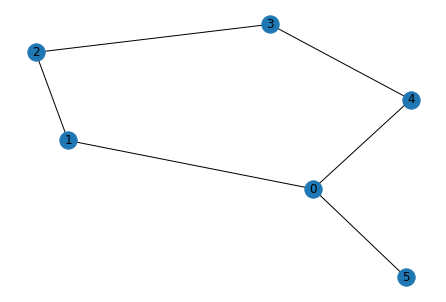

In [35]:
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

In [36]:
# You can also get the degree for a single node
G.degree(5)

1

#### Quick exercise

In [37]:
# How to select the node with the greatest degree?
max(G, key=G.degree)

0

In [38]:
# We can get the neighbors of node 0
list(G.neighbors(0))

[1, 4, 5]

In [39]:
# We can also access the neighbors, along with the edge labels (empty in this example)
# using the subscript notation
G[0]

AtlasView({1: {}, 4: {}, 5: {}})

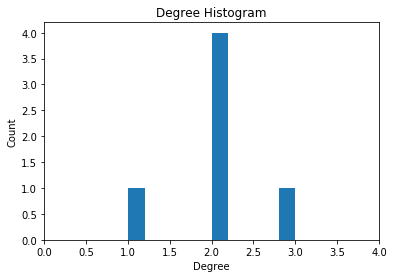

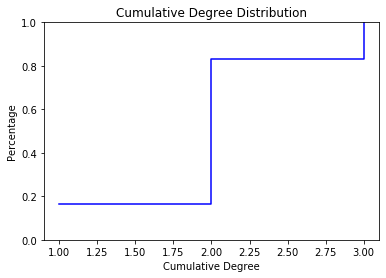

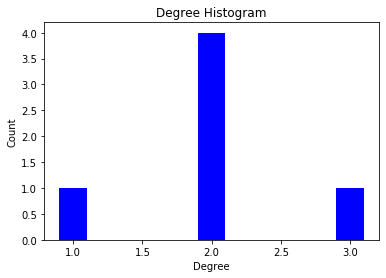

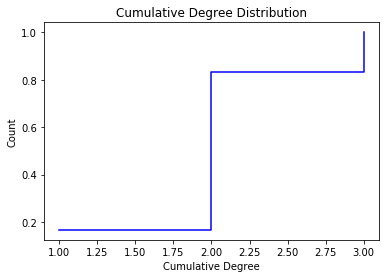

In [40]:
# Plot degree distributions


num=dict(G.degree).values()

fig, ax = plt.subplots()
plt.hist(num)
plt.title("Degree Histogram")
plt.xlim(0,4)
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

n = len(num) #number of nodes in the network
X2 = sorted(num)
F2 = np.array(range(1,n+1))/float(n)

fig, ax = plt.subplots()
plt.plot(X2, F2, color='b',drawstyle='steps-post')
plt.title("Cumulative Degree Distribution")
plt.ylabel("Percentage")
plt.xlabel("Cumulative Degree")
plt.ylim(0,1)
plt.show()



import collections
import numpy as np

degree_count = collections.Counter([d for n,d in G.degree])
degree_count_sorted = sorted(degree_count.items(), key=lambda pair: pair[0], reverse=False)
deg, cnt = zip(*degree_count_sorted)

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.2, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

cnt_cumsum = np.cumsum(cnt)
cnt_cumsum = cnt_cumsum/max(cnt_cumsum)

fig, ax = plt.subplots()
plt.plot(deg, cnt_cumsum, color='b',drawstyle='steps-post')

plt.title("Cumulative Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Cumulative Degree")

plt.show()
    


#### Weighted Graphs and weighted degree

Edges can have attributes, a very common and useful edge attribute is **weight** which is used to model intensity of relations.

The weighted degree of a node is the sum of the weights of its incident edges. 

{(0, 1): Text(0.722299438270044, 0.25121805722873647, '1'),
 (0, 4): Text(-0.10261802090578478, 0.819342271632937, '2'),
 (1, 2): Text(0.4832011654903683, -0.6952013476058799, '3'),
 (2, 3): Text(-0.3797593165256756, -0.5705603288616735, '4'),
 (3, 4): Text(-0.7231232663289515, 0.19520134760588004, '5')}

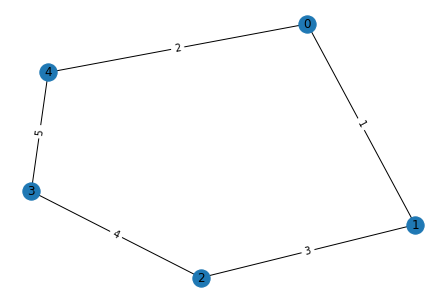

In [41]:
W = nx.cycle_graph(5)
for i, (u, v) in enumerate(W.edges(), 1):
    W[u][v]['weight'] = i
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [42]:
for i, (u, v) in enumerate(W.edges(), 1):
    print (u,v)

0 1
0 4
1 2
2 3
3 4


In [43]:
dict(W.degree())

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2}

In [44]:
dict(W.degree(weight='weight'))

{0: 3, 1: 4, 2: 7, 3: 9, 4: 7}

#### Quick exercise
How can we get the node with greatest weighted degree using the build-in **max** function?

In [45]:
wdegree = dict(W.degree(weight='weight'))
max(W, key=wdegree.get)

3

#### Undirected Graphs

In [47]:
nx.has_path(G, 0, 3)

True

In [48]:
list(nx.all_simple_paths(G, 0, 3))

[[0, 1, 2, 3], [0, 4, 3]]

In [49]:
nx.shortest_path(G, 0, 3)

[0, 4, 3]

In [50]:
nx.shortest_path_length(G, 0, 3)

2

How to obtaing the list of edges of a path from the list of nodes that NetworkX outputs?

In [51]:
path = nx.shortest_path(G, 0, 3)
path_edges = list(zip(path, path[1:]))
print("nodes in path: {}".format(path))
print("edges in path: {}".format(path_edges))


nodes in path: [0, 4, 3]
edges in path: [(0, 4), (4, 3)]


In [52]:
# You can also compute all shortest paths from a single source node
nx.single_source_shortest_path(G, 0)

{0: [0], 1: [0, 1], 4: [0, 4], 5: [0, 5], 2: [0, 1, 2], 3: [0, 4, 3]}

In [53]:
# Or the shortest paths between each pair of nodes
nx.all_pairs_shortest_path(G)

<generator object all_pairs_shortest_path at 0x7fd0f125e150>

#### Weighted Graphs

For weighted graphs the definition of shortest path considers edge weights; the shortest path is the path with minium total weight, and the path length is the sum of edge weights. This implies that the shortest weighted path does not necessary has less edges than an alternative path.

For computing weighted shortest paths you have to pass a a keyword argument the name of the edge attribute used as weight:

{('a', 'b'): Text(0.5759551644303517, -0.1956377528722606, '0.3'),
 ('a', 'c'): Text(0.028034747906207316, -0.2657357631439242, '2.0'),
 ('b', 'c'): Text(0.3960100876634408, 0.07517700439562451, '0.5'),
 ('c', 'd'): Text(-0.5759551644303518, 0.19563775287226062, '1.0')}

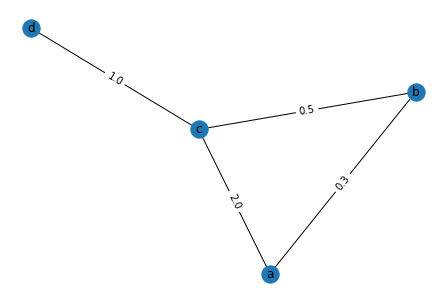

In [15]:
W = nx.Graph()
W.add_edge('a', 'b', weight=0.3)
W.add_edge('b', 'c', weight=0.5)
W.add_edge('a', 'c', weight=2.0)
W.add_edge('c', 'd', weight=1.0)
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [ ]:
nx.shortest_path(W, 'a', 'd')

In [ ]:
nx.shortest_path(W, 'a', 'd',weight='weight')

In [ ]:
nx.shortest_path_length(W, 'a', 'd',weight='weight')

### Illustrate paths in the Florentine families graph

Shortest paths are not unique, we can have more of one path with the same length. You can use **nx.all_shortest_paths** to get all shortest paths.

In [ ]:
G = nx.florentine_families_graph()
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

In [ ]:
source = 'Medici'
target = 'Peruzzi'
nx.shortest_path(G, source, target)

In [ ]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

In [ ]:
for i, path in enumerate(nx.all_simple_paths(G, source, target), 1):
    print(i, path)

In [ ]:
for i, path in enumerate(nx.shortest_simple_paths(G, source, target), 1):
    print(i, path)

### Degree Centrality

In [ ]:
from operator import itemgetter

In [ ]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

### Betweenness centrality

In [ ]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

### Closeness centrality


In [ ]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

### Eigenvector Centrality

In [ ]:
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)